In [1]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal, ROUND_HALF_UP
import random

In [2]:
class Player:
    """
    アカウントの各属性値を保持
    
    Attributes
    --------------
    name : str
        アカウント名(ID)
    num_games : int
        試合数
    wins : int
        勝利数
    wp : float
        勝率(winning percentage) (=勝利数/試合数)
    rank : str
        ランク {beginner,super,hyper,elite,exper,master}
    loss_cnt : int
        連敗数
    cpu_cnt : int
        cpu戦突入回数
    bd : boolean
        {True:BDする,False:BDしない}
    """
    def __init__(self,name,rank="master"):
        """
        Parameters
        -------------------
        name : str
            アカウント名
        rank : str
            {beginner,super,hyper,elite,exper,master}
        """
        self.name = name
        self.rank = rank
        self.num_games = 0
        self.wins = 0
        self.wp = 0.
        self.loss_cnt = 0
        self.cpu_cnt = 0
        self.loss_cnts = 0
        self.bd = False
    
    def status(self):
        # status
        print(f"user name:{self.name},\n rank:{self.rank},\n number of games:{self.num_games},\n winning percentage:{self.wp}[%]")
        
    def result_win(self):
        # 勝利時の処理
        self.num_games += 1
        self.wins += 1
        self.loss_cnt = 0 # 連敗リセット
        wp = self.wins/self.num_games*100 # 勝率
        wp = Decimal(str(wp)).quantize(Decimal('0.1'),rounding=ROUND_HALF_UP) # 小数第一位まで
        self.win_rate = float(wp)
        
    def result_loss(self):
        # 敗北時の処理
        self.num_games += 1
        self.loss_cnt += 1
        wp = self.wins/self.num_games*100
        wp = Decimal(str(wp)).quantize(Decimal('0.1'),rounding=ROUND_HALF_UP)
        self.wp = float(wp)
    
    def rank_up(self):
        # ランクアップ
        ranks = ["beginner","super","hyper","elite","exper","master"]
        if self.rank == "master":
            # 元からmasterなら何もしない
            pass
        else:
            idx = ranks.index(self.rank) # ranks内から該当のrankを検索
            self.rank = rank[idx+1] # 自身のrankの上のrankに書き換える
    
    def cpu_counter(self):
        self.cpu_cnt += 1

    def reset(self):
        # アカウントのステータスをリセット
        self.num_games = 0
        self.wins = 0
        self.wp = 0.
        self.loss_cnt = 0
        self.cpu_cnt = 0
        self.bd = False

In [3]:
def match_time_1(team1,team2):
    """
    決着は運によってのみ決まる場合
    """
    # 完全なランダム
    p = random.uniform(0.0,1.0)
    if p>=0.5:
        # team1が勝利、tema2が敗北
        for teammate1,teammate2 in zip(team1,team2):
            teammate1.result_win()
            teammate2.result_loss()
    else:
        # team1が敗北、tema2が処理
        for teammate1,teammate2 in zip(team1,team2):
            teammate1.result_loss()
            teammate2.result_win()

def match_time_2(team1,team2):
    """
    決着はBDを属性に持ったplayerが多い方が負ける場合.
    BDを属性に持ったplayerが同数の場合はmatch_time_1と同じ処理
    """
    # BDの属性持ちの調査
    num_bd_team1 = [teammate1.bd for teammate1 in team1]
    num_bd_team2 = [teammate2.bd for teammate2 in team2]
    # BDの属性持ち数
    num_bd_1 = num_bd_team1.count(True)
    num_bd_2 = num_bd_team2.count(True)
    
    if num_bd_1 == num_bd_2:
        # BD
        match_time_1(team1,team2)
    elif num_bd_1<num_bd_2:
        # team2の方がBD属性持ちが多い
        # team1が勝利、tema2が敗北
        for teammate1,teammate2 in zip(team1,team2):
            teammate1.result_win()
            teammate2.result_loss()
    else:
        # team1が敗北、tema2が処理
        for teammate1,teammate2 in zip(team1,team2):
            teammate1.result_loss()
            teammate2.result_win()

In [4]:
def matching_system_1(players_matching):
    """
    無作為にチームを組む
    
    Returns
    -------------
    pairs : マッチングしたチームとチームを1つにまとめたリストを試合が成立した数だけ保持したリスト
        　　リストを作る.
            e.g.) pairs = [[team1,team2],[team3,team4],...]
                  これは team1 vs. team2, team3 vs.team4, ...を意味する
    """
    num_events = len(players_matching)//10 # 行われる試合数
    players_matching_success = random.sample(players_matching,k=num_events*10)
    players_shuffle = players_matching_success.copy()
    random.shuffle(players_matching_success) # ランダムに並び替え
    # players_matching_success を5人チームごとに分ける
    players_shuffle = [players_shuffle[idx:idx+5] for idx in range(0,len(players_shuffle),5)]
    
    # eventごとにまとめる
    pairs = []
    for i in range(0,len(players_matching_success),2):
        pairs.append([[players_matching_success[i]],[players_matching_success[i+1]]])
    return pairs

def matching_system_2(players_matching):
    """
    勝率の近い人でマッチング
    
    Returns
    -------------
    pairs : マッチングしたチームとチームを1つにまとめたリストを試合が成立した数だけ保持したリスト
        　　リストを作る.
            e.g.) pairs = [[team1,team2],[team3,team4],...]
                  これは team1 vs. team2, team3 vs.team4, ...を意味する
    """
    num_events = len(players_matching)//10 # 行われる試合数
    players_matching_success = random.sample(players_matching,k=num_events*10)
    players_sort = players_matching_success.copy()
    # 昇順に並び替える
    players_sort.sort(key=lambda x:x.wp)
    # players_sort を10人ごとに分ける
    players_sort = [players_sort[idx:idx+10] for idx in range(0,len(players_sort),10)]
    
    # eventごとにまとめる
    pairs = []
    for players in players_sort:
        team1 = [players[0],players[3],players[4],players[7],players[8]]
        team2 = [players[1],players[2],players[5],players[6],players[9]]
        pairs.append([team1,team2])
    return pairs

def matching_system_loss(players):
    """
    連敗数を調査し、一定数を超えていたら、cpu戦させる.
    
    Returns:
    ---------------------
    players_pvp : list
        cpu戦の必要がない人のリスト
    """
    # CPU戦になるplayerのリスト
    players_cpu = list(filter(lambda x:x.loss_cnt>=5,players))
    
    # CPU戦には必ず勝つ
    for player in players_cpu:
        player.result_win()
        player.cpu_counter()
    
    # PvP戦に参加する人のリスト
    players_pvp = list(set(players)-set(players_cpu))
    return players_pvp

In [5]:
def create_histogram(players,num_games,bd_rate):
    win_rates = [player.wp for player in players]
    fig = plt.figure(figsize=(3.5,3.5))
    ax = fig.add_subplot(111)
    ax.hist(win_rates,bins='auto')
    ax.set_title(f'Number of games: {num_games}')
    ax.set_xlabel("winnig percentage[%]")
    ax.set_ylabel("freq")
    ax.text(0.99,0.99,
            f"max:{max(win_rates)}[%],min:{min(win_rates)}[%],bd_rate:{bd_rate}[%]",
            va='top',ha='right',transform=ax.transAxes)
    plt.savefig(f"winnig_rate_N{N}_G{num_games}_B{bd_rate}.png")

In [6]:
def assignment_bd(players,bd_rate=0.1):
    """
    クラスPlayerのbdをFalse→Trueに変換
    """
    num_players = len(players)
    players_bd = random.sample(players,k=int(num_players*bd_rate))
    for player in players_bd:
        player.bd = True

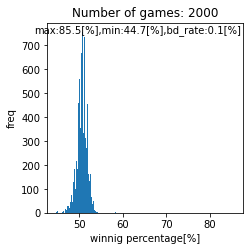

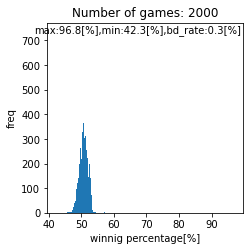

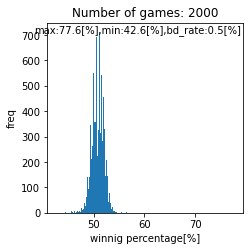

In [8]:
# parameters
N = 10000 # 競技人口
num_iters = [2000] # ループ回数
matching_system = matching_system_2 # マッチングシステム
match_time = match_time_2 # 勝敗の要因
bd_rates = [0.1,0.3,0.5]

# アカウント作成
players = []
for i in range(1,N+1):
    players.append(Player(f"{i}"))

# シミュレーション
for num_games in num_iters:
    for bd_rate in bd_rates:
        assignment_bd(players,bd_rate) # BDマンを生成
        for i in range(num_games):
            players_pvp = matching_system_loss(players) # 救済措置
            pairs = matching_system(players_pvp) # マッチング
            for pair in pairs:
                match_time(*pair) # 試合開始
        create_histogram(players,num_games,bd_rate) # 図示
        [player.reset() for player in players] # 初期化

In [ ]:
# parameters
N = 10000 # 競技人口
num_iters = [1000] # ループ回数
matching_system = matching_system_2 # マッチングシステム
match_time = match_time_1 # 勝敗の要因

# アカウント作成
players = []
for i in range(1,N+1):
    players.append(Player(f"{i}"))

# シミュレーション
for num_games in num_iters:
    for i in range(num_games):
        pairs = matching_system(players) # マッチング
        for pair in pairs:
            match_time(*pair) # 試合開始
        #win_rates = [player.wp for player in players]
        loss_cnts = [player.loss_cnt_rate for player in players]
        loss_max = [player.loss_max for player in players]
    create_histogram_loss_max(loss_max,num_games)
    #create_histogram(win_rates,num_games) # 図示
    create_histogram_loss(loss_cnts,num_games)
    [player.reset() for player in players] # 初期化

In [ ]:
win_rates = [player.status() for player in players]
print("max_win_rate:",max(win_rates))
print("min_win_rate:",min(win_rates))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(win_rates,bins='auto')
ax.set_title(f'Number of games: {NUM_GAMES}')
ax.set_xlabel("winnig percentage[%]")
ax.set_ylabel("freq")
ax.text(0.99,0.99,
        f"max:{max(win_rates)}[%],min:{min(win_rates)}[%]",
        va='top',ha='right',transform=ax.transAxes)
ax.set_xlim(42,58)
plt.show()

In [ ]:
plt.figure(tight_layout=True)
 
# ヒストグラム（度数分布）
plt.subplot(221)
plt.hist(win_rates, bins='auto')
plt.title("Histogram")
 
# 確率密度関数（相対度数）
plt.subplot(222)
plt.hist(win_rates, bins='auto', density=True)
plt.title("Probability density function")
 
# 累積ヒストグラム（累積度数分布）
plt.subplot(223)
plt.hist(win_rates, bins='auto', cumulative=True)
plt.title("Cumulative histogram")
 
# 累積分布関数（累積相対度数）
plt.subplot(224)
plt.hist(win_rates, bins='auto', cumulative=True, density=True)
plt.title("Cumulative density function")
 
plt.show()